# Machine Learning Foundation Nanodegree
## Project 5: Predicting Boston Housing Prices

## Improting Libraries

In [12]:
# Importing necessary Libraries For this project
import numpy as np
import pandas as pd
import visuals as vs 
from sklearn.cross_validation import ShuffleSplit

# For Grpahical display in the project
%matplotlib inline

# Loading the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


# Implementating Liabraries 

## Calculate Statistics

In [13]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# The calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


## Question 1  

### Feature Observation

As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

## Answer :

**RM**:The number of rooms(RM), It plays a major role in providing more space for families to live in. Therefore, An increase in value of RM would generally result in the **increase** of MEDV. A additional space/room makes people to be willing to pay more which directly increasing the price of the place. 

**LSTAT**: The vaue in LSTAT would increase if the value of MEDV **decreases**. The home value (MEDV) tends to decrease in a neighbourhood of more working poor (LSTAT) as the market cannot sustain the higher prices. 

**PTRATIO**: If the value of MEDV **decrease** PTRATIO increases. An increase in the student-teacher ratio/more students per teacher (PTRATIO) is typically a result of lack of funding for the school or lack of good quality teachers wanting to work in the neighborhood - and perceived as a bad/not as good a place for families be live. In turn, people/families would rather live elsewhere and those who can afford to move do, and again, home values (MEDV) decreases as "the market" (those who can't afford to move) cannot sustain the higher home prices. 

For all three features, a decrease in their value will result in the opposite of the stated outcome value.

### Model Developing
The second section will help us to develop such tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
To measure the quality of the given model, it done through quanitifying its performance over training and testing.
This is basically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [14]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

## Question 2 :

### Goodness of Fit

Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [7]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


## Answer :

Cofficient basically determines the correlation between actual and predicted values. Value 0 indicates that the model always fails to predict the actual value, where a value of 1 indicates the model prefectly predicts the target value.

I would say that the model successfully captured the variation of the target variables.



### Implementation: Shuffle and Split Data
Next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. 

Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=33)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


## Question 3 : 
### Training and Testing

*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

## Answer : 

**Validation** is the biggest benefit in splitting your dataset into training and testing, which means it helps to validate the accuracy of your training. 

Splitting the dataset into a suitable ratio of training and testing optimizes the scenerio of using just enough data to train the algorithm for a good fit for you. But using entire data set for training will result in overlifing, means that dataset would not be generalized and it will already know the answers.

Besides, If you use the entrie dataset for testing, would result in over generalizeg - guessing at the answers with very little accuracy.




## Analyzing Model Performance

Third section of the project, we will look at several models' learning and testing performances on various subsets of training data. And, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

## Learning Curves

The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

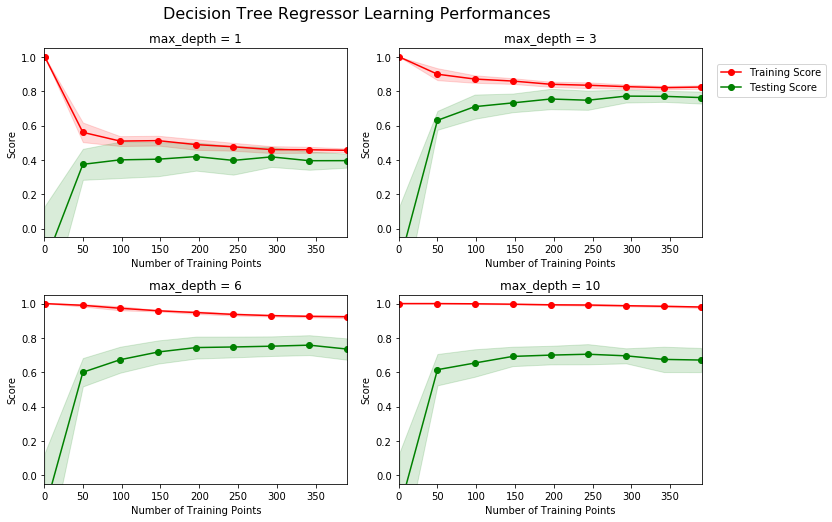

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

## Question 4 :
### Learning the Data

*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

## Answer :

I choosed the graph **_max-depth of 3_**.

By adding more training points, score **decreases** alongwith its **variance** of the curve, which also tends to **decrease**. 
The testing curve's score also increases as more data points are provided up until approximately 300, as it then tends to level off and run parallel with the training curve. 

Both training and validation curves have levelled off, providing more training points would not benefit the model with significant improvements but may only increase time consumption for training and testing.

### Complexity Curves

This code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. 

The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

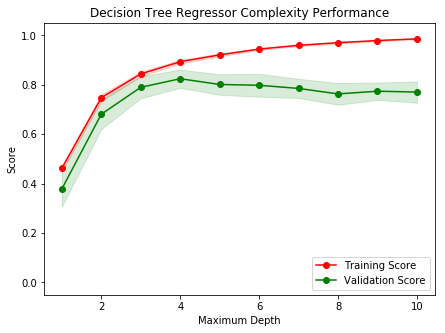

In [10]:
vs.ModelComplexity(X_train, y_train)

## Question 5 :
### Bias-Variance Tradeoff

*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

## Answer :


Justifying my conclusions based on the visual cues of the consistent variance on the validation score, in combination with the convergence of training and validation curves at max-depth of 1 and the large gap between the training and validation curves at a max-depth of 10. With a maximumn depth of 1, based on the complexity curve both the training and validation scores are low, the model suffers from high bias (underfitting). And at a maximum depth of 10 the model appears to suffer from high variance (overfitting).

Model suffers from high bias when a minimal number of features are used. This gives a low R^2 value (near 0) and underfitting occurs. It is over generalized, scoring a very low accuracy during both training and testing. While a model that suffers from high variance, tends to be the opposite. It has a high R^2 value (approaching 1) and is overfitting the data. Meaning, it is not generalized enough, with very high scores on the training data but low score on testing data (data it hasn't seen before).

## Question 6 : 
### Best-Guess Optimal Model

*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

## Answer :

Both validation and training curves are at their smallest level of uncertainty between each other,

At a max-depth of 3, both validation and training curves are at their smallest/closest level of uncertainty between each other, while the validation score is near its highest value. I believe a max-depth of 3 would result in the best generalized model.

However, at a max-depth of 4 or more, both training and validation curves diverge, where you can see the training curve approaching a score of 1, indicating it's perfectly matching the data points leading to overfitting (high variance) while the validation curve trends downward.


## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

## Question 7 : 
### Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

## Answer :

The best performance of model can be achieved by grid search. It automates the process of tuning parameters of a model to get the highest performance. For example, on a decision tree, you may want to find the best performance with max-depth (3 or 4) and criterion (entropy and gini). Grid search combines these parameter options for you, as in the table below, and allows for faster experiments to help optimize the learning. 

Max-Depth | Criterion
--- | --- 
3 | entropy
3 | gini
4 | entropy
4 | gini

With only 2 features as in the example above, it may not be extremely helpful, but if there are a number of parameters and each with its own wide possible ranges of values, the grid search would be the most efficient way to fine tune them for the best performance.

## Question 8 : 
### Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

## Answer : 
The k-fold cross-validation training technique is the process of dividing your data points into smaller number of k bins. Testing then occurs on one of the k bins while training occurs with the other k-1 bins. This process, testing and training, occurs k times across all bins for testing and training. The average of the k testing experiments are used as the overall result of the model.

Although grid search automates the parameter selection and tuning for best performance, not using cross-validation could result in the model being tuned only to a specific subset of data. This is because without using a technique such as cross-validation, for example, only using kfold to create testing and training data, will not shuffle your data points, i.e if your dataset is ordered or in any pattern, grid search would only perform tuning on the same subset of training data. Utilizing cross-validation, eliminates this issue by using the entire dataset allowing grid search to optimize parameter tuning across all data points.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

## TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    ## Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    ## TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    ## TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)} # last value in range is exclusive

    ## TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    ## TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    ## Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    ## Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

## Question 9 :
### Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

## Answer :  

As the model has a max depth of 4. 
Not surprisingly result compared to my guess, as I was debating if my Q6 answer should have been 3 or 4. 

So, my guess was considerably accurate.

## Question 10 :
### Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [15]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    

NameError: name 'reg' is not defined

## Answer :

Recommendation to each client is to sell for the following with the given explanation.

- **Client 1: 409,400.00** - At 409k this home is within one std of the mean at approx. $454k. With 5 rooms and a relatively low neighborhood poverty level and student-teacher ratio, this would be a good selling price.

- **Client 2: 229,682.35** - The minimum selling price in the area is just over $100k. However, their 4 rooms are helping raise the price of their home, since both teacher-student ratio and provery levels are quite high both of which negatively impact the selling price.

- **Client 3: 938,053.85** - With a large number of rooms, very low neighborhood poverty levels and low student-teacher ratio, this home's selling price is near the maximum selling price in the neighborhood and is reasonably priced

### Sensitivity
Sometimes, a model is either too complex or too simple to sufficiently generalize to new data, Or, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

NameError: name 'fit_model' is not defined

## Question 11 : 
### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

## Answer :

The constructed model, as is, should not be used in a real-world setting. There are a number of reasons for this answer and below I've highlighted a few:

- **Relevancy:** The data which the current model has been trained on, collected in 1978, is not relevant today (2016)
- **Applicable:** A model training on data from a city such as Boston, is not suitable to be used in urban areas such as Ohio nor would be it applicable for some other cities such as San Francisco 
- **Features:** Although the dataset covers features which are present in today's homes, it is missing features that could affect the selling price in today's housing market such as size of a backyard or approximity to public transit if the home is in a large city.
- **Robustness:** The current model appears to be too sensivity/not well generalized as running it multiple times for a specific client (as seen above) provides a wide variance in pricing, which as is would be unsatifactory in the real-world.

Supplying the model with more data, between 1978 and 2016, along with using a few additional features, the model may be robust and accurate enough to be applied to data from cities similar to Boston in the real-world.